# CS583 CourseProject-National Data Science Bowl

### Name: Zhipeng Lin

##### Competition Url: https://www.kaggle.com/c/datasciencebowl

In [0]:
!unzip \train.zip

In [0]:
!unzip \test.zip

In [0]:
import sklearn
from skimage.io import imread
from skimage.transform import resize
import glob
import os

from matplotlib import pyplot as plt
from matplotlib import colors
from pylab import cm
from skimage import segmentation
from skimage.morphology import watershed
from skimage import measure
from skimage import morphology
import numpy as np
import pandas as pd
from scipy import ndimage


In [0]:
filepath = '/content/train'
label_list = os.listdir(filepath)

In [0]:
a ='/content/label.txt'
label_dic = {}
with open(a) as fp:
    txt = fp.read()
txt = txt.split('\n')

label_dic = {}
for i in enumerate(txt):
  k, v = i
  label_dic[v] = k

In [0]:
label_dic

{'acantharia_protist': 2,
 'acantharia_protist_big_center': 0,
 'acantharia_protist_halo': 1,
 'amphipods': 3,
 'appendicularian_fritillaridae': 4,
 'appendicularian_s_shape': 5,
 'appendicularian_slight_curve': 6,
 'appendicularian_straight': 7,
 'artifacts': 9,
 'artifacts_edge': 8,
 'chaetognath_non_sagitta': 10,
 'chaetognath_other': 11,
 'chaetognath_sagitta': 12,
 'chordate_type1': 13,
 'copepod_calanoid': 22,
 'copepod_calanoid_eggs': 14,
 'copepod_calanoid_eucalanus': 15,
 'copepod_calanoid_flatheads': 16,
 'copepod_calanoid_frillyAntennae': 17,
 'copepod_calanoid_large': 19,
 'copepod_calanoid_large_side_antennatucked': 18,
 'copepod_calanoid_octomoms': 20,
 'copepod_calanoid_small_longantennae': 21,
 'copepod_cyclopoid_copilia': 23,
 'copepod_cyclopoid_oithona': 25,
 'copepod_cyclopoid_oithona_eggs': 24,
 'copepod_other': 26,
 'crustacean_other': 27,
 'ctenophore_cestid': 28,
 'ctenophore_cydippid_no_tentacles': 29,
 'ctenophore_cydippid_tentacles': 30,
 'ctenophore_lobate': 

In [0]:
x_row=[]
y_row=[]
# load row data balanced
num_img = 0
for label in label_list:
  path = os.path.join(filepath,label)
  filenamedir = os.listdir(path)
  index = label_dic[label]

  num_exp = len(filenamedir)
  num_exp = 300 / num_exp
  num = int(num_exp)
  if num ==0: num+=1

  count = 0

  for i in range(num):
    for imagename in filenamedir:
      imagepath = os.path.join(path,imagename)
      im = imread(imagepath)
      img = 255 - im
      x_row.append(img)
      y_row.append(index)
      num_img += 1 
      count+=1
      if count > 350:
        break

  print(label,':',index ,' count:',count,' num:',num_img)
  # print(label,':',index ,' count:',count,' num:',num_img ,' per',num_img / 30336)

euphausiids_young : 47  count: 266  num: 266
copepod_calanoid_eucalanus : 15  count: 288  num: 554
siphonophore_calycophoran_sphaeronectes_stem : 99  count: 285  num: 839
copepod_other : 26  count: 288  num: 1127
tunicate_doliolid : 114  count: 351  num: 1478
radiolarian_chain : 90  count: 287  num: 1765
hydromedusae_other : 66  count: 300  num: 2065
echinoderm_larva_pluteus_early : 39  count: 276  num: 2341
invertebrate_larvae_other_B : 79  count: 288  num: 2629
siphonophore_other_parts : 102  count: 290  num: 2919
acantharia_protist_big_center : 0  count: 299  num: 3218
hydromedusae_typeF : 77  count: 244  num: 3462
protist_noctiluca : 84  count: 351  num: 3813
siphonophore_calycophoran_sphaeronectes : 101  count: 179  num: 3992
hydromedusae_typeD_bell_and_tentacles : 74  count: 280  num: 4272
copepod_calanoid_small_longantennae : 21  count: 261  num: 4533
ctenophore_cydippid_no_tentacles : 29  count: 294  num: 4827
tunicate_salp_chains : 116  count: 292  num: 5119
trichodesmium_mult

In [0]:
x_data = np.asarray(x_row.copy())

In [0]:
def imgAugment(image):
  imthr = image.copy()
  imthr = np.where(image > np.mean(image),0.,1.0)
  imdilated = morphology.dilation(imthr, np.ones((3,3)))
  # labels = measure.label(imdilated)
  # img = imthr*labels
  return img

In [0]:
x_data_aug = [imgAugment(i) for i in x_data]

In [0]:
# random rotate
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=180)
datagen.fit(x_resize)
# show_augment_image(x_resize, y_onehot,datagen)

In [0]:
# resize img
maxlength = 64
features = maxlength **2
x_resize = []
for img in x_data_aug:
  imgresize = resize(img,(maxlength,maxlength))
  x_resize.append(imgresize)


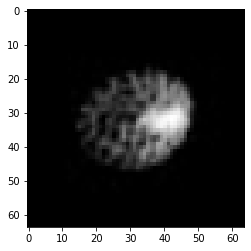

In [0]:
plt.imshow(x_resize[984],cmap=cm.gray)

In [0]:
# one hot
from keras.utils import to_categorical
y_onehot = to_categorical(y_row)

Using TensorFlow backend.


In [0]:
x_resize = np.asarray(x_resize)

In [0]:
y_onehot.shape,x_resize.shape

((30336, 121), (30336, 64, 64))

In [0]:
x_resize_2d = x_resize.reshape(x_resize.shape[0], maxlength, maxlength, 1)
x_resize_2d.shape

(30336, 64, 64, 1)

### multi logloss

In [0]:
def logloss(y_pred,y_true):
  n = y_true.shape[0]
  log = np.log(y_pred + 1e-15)
  multi = y_true * log
  logloss = - (np.sum(multi)) / n
  # print(logloss)
  return logloss

### Split train and valid set

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_resize_2d, y_onehot, test_size = 0.2, random_state = 1)
x_train.shape, x_valid.shape

((24268, 64, 64, 1), (6068, 64, 64, 1))

### basic 5 laryer CNN net

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.models import Sequential
from keras import regularizers


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(2,2), activation='relu', padding='same', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(121,activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         


In [0]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1E-4),metrics=['acc','top_k_categorical_accuracy'])

In [0]:
epochs = 20
history = model.fit(x_train,y_train,batch_size=128,epochs=epochs, validation_data=[x_valid, y_valid])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 27546 samples, validate on 6887 samples
Epoch 1/20





27546/27546 [==============================] - 14s 500us/step - loss: 6.4164 - acc: 0.0095 - top_k_categorical_accuracy: 0.0465 - val_loss: 5.3613 - val_acc: 0.0091 - val_top_k_categorical_accuracy: 0.0479
Epoch 2/20
27546/27546 [==============================] - 11s 397us/step - loss: 5.0585 - acc: 0.0098 - top_k_categorical_accuracy: 0.0486 - val_loss: 4.8919 - val_acc: 0.0093 - val_top_k_categorical_accuracy: 0.0469
Epoch 3/20
27546/27546 [==============================] - 11s 409us/step - loss: 4.8462 - acc: 0.0102 - top_k_categorical_accuracy: 0.0494 - val_loss: 4.8214 - val_acc: 0.0090 - val_top_k_categorical_accuracy: 0.0456
Epoch 4/20
27546/27546 [==============================] - 11s 404us/step - loss: 4.8125 - acc: 0.0089 - top_k_categorical_accuracy: 0.0500 - val_loss: 4.8088 - val_acc: 0.0093 - val_top_k_categorica

In [0]:
a = model.predict(x_valid)
b = y_valid
# a,b

In [0]:
logloss(a,b)

4.782591408632205

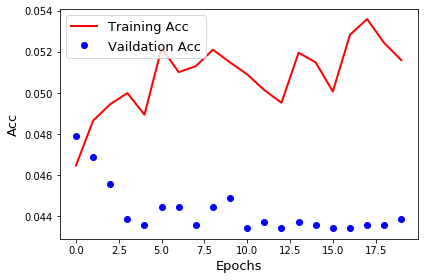

In [0]:
hist_train_loss = history.history['top_k_categorical_accuracy']
hist_vaild_loss = history.history['val_top_k_categorical_accuracy']
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(6, 4))
epochs_loss = history.epoch

line0, = plt.plot(hist_train_loss, '-r', LineWidth=2)
line1, = plt.plot(hist_vaild_loss,'ob', LineWidth=4)

plt.xlabel('Epochs', FontSize=13)
plt.ylabel('Acc', FontSize=13)
plt.xticks(FontSize=10)
plt.yticks(FontSize=10)
plt.legend([line0, line1], ['Training Acc','Vaildation Acc'], fontsize=13)
plt.tight_layout()
plt.show()

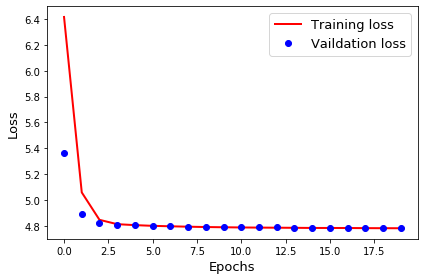

In [0]:
hist_train_loss = history.history['loss']
hist_vaild_loss = history.history['val_loss']
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(6, 4))
epochs_loss = history.epoch

line0, = plt.plot(hist_train_loss, '-r', LineWidth=2)
line1, = plt.plot(hist_vaild_loss,'ob', LineWidth=4)

plt.xlabel('Epochs', FontSize=13)
plt.ylabel('Loss', FontSize=13)
plt.xticks(FontSize=10)
plt.yticks(FontSize=10)
plt.legend([line0, line1], ['Training loss','Vaildation loss'], fontsize=13)
plt.tight_layout()
plt.show()

### resnet 18

In [0]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Dropout, Conv1D
from keras.layers import AveragePooling2D, Input, Flatten, MaxPooling2D, MaxPooling1D, AveragePooling1D
from keras.regularizers import l2
from keras.optimizers import Adam,RMSprop
from keras.models import Model
from keras import regularizers

In [0]:
def resnet_block(inputs,num_filters,kernel_size=3):
  x = Conv2D(num_filters,kernel_size=kernel_size,strides=1,padding='same',kernel_regularizer=regularizers.l2(0.001))(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(num_filters,kernel_size=kernel_size,strides=1,padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
  x = keras.layers.add([x,inputs])
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  return x

In [0]:
def resnet(input_shape):
  inputs = Input(shape=input_shape)
  # conv 1
  x = Conv2D(filters=64,kernel_size=7,strides=2,padding='same')(inputs)

  # conv 2.x
  x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
  x = resnet_block(inputs=x ,num_filters=64,kernel_size=3)
  x = resnet_block(inputs=x ,num_filters=64,kernel_size=3)

  # conv 3.x
  x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
  x = Conv2D(filters=128,kernel_size=3,strides=1,padding='same')(x)
  x = resnet_block(inputs=x ,num_filters=128,kernel_size=3)
  x = resnet_block(inputs=x ,num_filters=128,kernel_size=3)

  x = Dropout(0.5)(x)

  # conv 4.x
  x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
  x = Conv2D(filters=256,kernel_size=3,strides=1,padding='same')(x)
  x = resnet_block(inputs=x ,num_filters=256,kernel_size=3)
  x = resnet_block(inputs=x ,num_filters=256,kernel_size=3)

  #conv 5.x
  x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
  x = Conv2D(filters=256,kernel_size=3,strides=1,padding='same')(x)
  x = resnet_block(inputs=x ,num_filters=256,kernel_size=3)
  x = resnet_block(inputs=x ,num_filters=256,kernel_size=3)

  x = AveragePooling2D(pool_size=2)(x)
  x = Flatten()(x)

  outputs = Dense(121,activation='softmax')(x)


  model = Model(inputs=inputs,outputs=outputs)
  return model


In [0]:
model = resnet((64,64,1))
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   36928     

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=1e-3),metrics=['acc','top_k_categorical_accuracy'])

In [0]:
epochs = 20
history = model.fit(x_train,y_train,batch_size=128,epochs=epochs, validation_data=[x_valid, y_valid])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 24268 samples, validate on 6068 samples
Epoch 1/20
24268/24268 [==============================] - 32s 1ms/step - loss: 4.8274 - acc: 0.0630 - top_k_categorical_accuracy: 0.2293 - val_loss: 5.9027 - val_acc: 0.0170 - val_top_k_categorical_accuracy: 0.1348
Epoch 2/20
24268/24268 [==============================] - 26s 1ms/step - loss: 4.2158 - acc: 0.0654 - top_k_categorical_accuracy: 0.2317 - val_loss: 4.2410 - val_acc: 0.0603 - val_top_k_categorical_accuracy: 0.2175
Epoch 3/20
24268/24268 [==============================] - 26s 1ms/step - loss: 4.2146 - acc: 0.0662 - top_k_categorical_accuracy: 0.2312 - val_loss: 4.2334 - val_acc: 0.0603 - val_top_k_categorical_accuracy: 0.2286
Epoch 4/20
24268/24268 [==============================] - 26s 1ms/step - loss: 4.2107 - acc: 0.0630 - top_k_categorical_accuracy: 0.2321 - val_loss: 4.2194 - val_acc: 0.0687 - val_top_k_categorical_accuracy: 0.

In [0]:
logloss(a,b)

4.304094931917436

### resnet50

In [0]:
def resnet_block_bottleneck(inputs,num1,num2,num3):
  x = Conv2D(num1,kernel_size=(1,1),strides=1,padding='same',kernel_regularizer=regularizers.l2(0.0001))(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(num2,kernel_size=(3,3),strides=1,padding='same',kernel_regularizer=regularizers.l2(0.0001))(inputs)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  x = Conv2D(num3,kernel_size=(1,1),strides=1,padding='same',kernel_regularizer=regularizers.l2(0.0001))(x)
  x = keras.layers.add([x,inputs])
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  return x

In [0]:
def resnet50(input_shape):
  inputs = Input(shape=input_shape)
  # conv 1
  x = Conv2D(filters=256,kernel_size=7,strides=2,padding='same')(inputs)

  # conv 2.x
  x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
  x = resnet_block_bottleneck(inputs=x,num1=64,num2=64,num3=256)
  x = resnet_block_bottleneck(inputs=x,num1=64,num2=64,num3=256)
  x = resnet_block_bottleneck(inputs=x,num1=64,num2=64,num3=256)

  # conv 3.x
  x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
  x = Conv2D(filters=512,kernel_size=3,strides=1,padding='same')(x)
  x = resnet_block_bottleneck(inputs=x,num1=128,num2=128,num3=512)
  x = resnet_block_bottleneck(inputs=x,num1=128,num2=128,num3=512)
  x = resnet_block_bottleneck(inputs=x,num1=128,num2=128,num3=512)
  x = resnet_block_bottleneck(inputs=x,num1=128,num2=128,num3=512)

  # x = Dropout(0.5)(x)
  # conv 4.x
  x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
  x = Conv2D(filters=1024,kernel_size=3,strides=1,padding='same')(x)
  x = resnet_block_bottleneck(inputs=x,num1=256,num2=256,num3=1024)
  x = resnet_block_bottleneck(inputs=x,num1=256,num2=256,num3=1024)
  x = resnet_block_bottleneck(inputs=x,num1=256,num2=256,num3=1024)
  x = resnet_block_bottleneck(inputs=x,num1=256,num2=256,num3=1024)

  #conv 5.x
  x = MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(x)
  x = Conv2D(filters=2048,kernel_size=3,strides=1,padding='same')(x)
  x = resnet_block_bottleneck(inputs=x,num1=512,num2=512,num3=2048)
  x = resnet_block_bottleneck(inputs=x,num1=512,num2=512,num3=2048)
  x = resnet_block_bottleneck(inputs=x,num1=512,num2=512,num3=2048)
  
  x = AveragePooling2D(pool_size=2)(x)
  x = Flatten()(x)
  x = Dropout(0.4)(x) 
  outputs = Dense(121,activation='softmax')(x)


  model = Model(inputs=inputs,outputs=outputs)
  return model

In [0]:
model = resnet50((64,64,1))
model.summary()










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 256)  12800       input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 16, 16, 256)  0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 16, 16, 64)   147520      ma

In [0]:
# print the network structure to a PDF file

# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot, plot_model

# SVG(model_to_dot(model, show_shapes=False).create(prog='dot', format='svg'))

# plot_model(
#     model=model, show_shapes=False,
#     to_file='resnet.jpg'
# )

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=1e-3),metrics=['acc','top_k_categorical_accuracy'])

In [0]:
epochs = 20
history = model.fit(x_train,y_train,batch_size=128,epochs=epochs, validation_data=[x_valid, y_valid])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 24268 samples, validate on 6068 samples
Epoch 1/20
24268/24268 [==============================] - 126s 5ms/step - loss: 4.9552 - acc: 0.0419 - top_k_categorical_accuracy: 0.1713 - val_loss: 4.7711 - val_acc: 0.0603 - val_top_k_categorical_accuracy: 0.1040
Epoch 2/20
24268/24268 [==============================] - 105s 4ms/step - loss: 4.5510 - acc: 0.0450 - top_k_categorical_accuracy: 0.1759 - val_loss: 4.6706 - val_acc: 0.0603 - val_top_k_categorical_accuracy: 0.1432
Epoch 3/20
24268/24268 [==============================] - 105s 4ms/step - loss: 4.4993 - acc: 0.0466 - top_k_categorical_accuracy: 0.1826 - val_loss: 4.6856 - val_acc: 0.0326 - val_top_k_categorical_accuracy: 0.0916
Epoch 4/20
24268/24268 [==============================] - 106s 4ms/step - loss: 4.4580 - acc: 0.0489 - top_k_categorical_accuracy: 0.1877 - val_loss: 4.6063 - val_acc: 0.0218 - val_top_k_categorical_accuracy

In [0]:
model.save('my_model_1.h5')

In [0]:
a = model.predict(x_valid)
b = y_valid
# a,b

In [0]:
logloss(a,b)

4.204441138451714

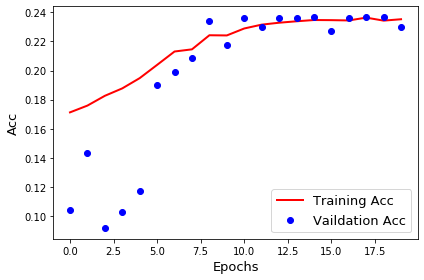

In [0]:
hist_train_loss = history.history['top_k_categorical_accuracy']
hist_vaild_loss = history.history['val_top_k_categorical_accuracy']
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(6, 4))
epochs_loss = history.epoch

line0, = plt.plot(hist_train_loss, '-r', LineWidth=2)
line1, = plt.plot(hist_vaild_loss,'ob', LineWidth=4)

plt.xlabel('Epochs', FontSize=13)
plt.ylabel('Acc', FontSize=13)
plt.xticks(FontSize=10)
plt.yticks(FontSize=10)
plt.legend([line0, line1], ['Training Acc','Vaildation Acc'], fontsize=13)
plt.tight_layout()
plt.show()

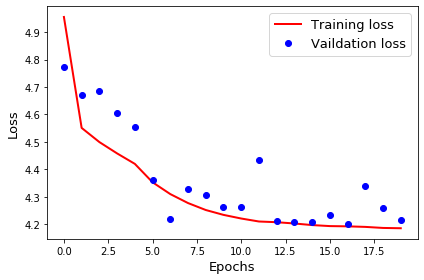

In [0]:
hist_train_loss = history.history['loss']
hist_vaild_loss = history.history['val_loss']
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(6, 4))
epochs_loss = history.epoch

line0, = plt.plot(hist_train_loss, '-r', LineWidth=2)
line1, = plt.plot(hist_vaild_loss,'ob', LineWidth=4)

plt.xlabel('Epochs', FontSize=13)
plt.ylabel('Loss', FontSize=13)
plt.xticks(FontSize=10)
plt.yticks(FontSize=10)
plt.legend([line0, line1], ['Training loss','Vaildation loss'], fontsize=13)
plt.tight_layout()
plt.show()

### random guess

In [0]:
y_valid.shape
y_rand=[]
for i in range(y_valid.shape[0]):
  rand = np.random.randint(y_valid.shape[1])
  y = to_categorical(rand, num_classes=121)
  y_rand.append(y)
y_rand = np.asarray(y_rand)

In [0]:
y_zeros = np.zeros_like(y_onehot)

In [0]:
logloss(y_rand,y_valid)

34.237104482531315

### test

In [0]:
testfilename = '/content/test'
x_test_row=[]
name_test=[]
num_img_test = 0

for imagename in os.listdir(testfilename):
  imagepath = os.path.join(testfilename,imagename)
  im = imread(imagepath)
  img = 255 - im
  x_test_row.append(img)
  name_test.append(imagename)
  num_img_test += 1

# num_img_test

In [0]:
len(x_test_row)

130400

In [0]:
x_test_aug = [imgAugment(i) for i in x_test_row]

In [0]:
maxlength = 64
features = maxlength **2
x_test_resize = []
for img in x_test_aug:
  imgresize = resize(img,(maxlength,maxlength))
  x_test_resize.append(imgresize)

In [0]:
x_test_resize = np.asarray(x_test_resize)

In [0]:
x_test_resize = x_test_resize.reshape((x_test_resize.shape[0],64,64,1))

In [0]:
x_test_resize.shape

(130400, 64, 64, 1)

In [0]:
from keras.models import load_model
load_model =load_model('/content/my_model.h5')
pred = load_model.predict(x_test_resize)

In [0]:
name_test_arr= np.asarray(name_test).reshape(130400,1)

In [0]:
out = np.hstack((name_test_arr,pred))

In [0]:
import pandas as pd

In [0]:
out_pd = pd.DataFrame(out)
print(out_pd)
# pd_data.to_csv('pd_data.csv')

               0             1    ...          120          121
0       142198.jpg  0.0030333314  ...  0.008953333  0.012297922
1        56023.jpg  0.0030333314  ...  0.008953333  0.012297922
2        89506.jpg  0.0030333314  ...  0.008953333  0.012297922
3        28955.jpg  0.0030333314  ...  0.008953333  0.012297922
4       155652.jpg  0.0030333314  ...  0.008953333  0.012297922
...            ...           ...  ...          ...          ...
130395   29834.jpg  0.0030333314  ...  0.008953333  0.012297922
130396  112844.jpg  0.0030333314  ...  0.008953333  0.012297922
130397   83394.jpg  0.0030333314  ...  0.008953333  0.012297922
130398  159728.jpg  0.0030333314  ...  0.008953333  0.012297922
130399   81601.jpg  0.0030333314  ...  0.008953333  0.012297922

[130400 rows x 122 columns]


In [0]:
out_pd.to_csv('pd_data.csv')

In [0]:
!cp '/content/pd_data.csv' '/content/drive/My Drive/CS583/'